In [1]:
series = []

f = open("hedwig.txt", "r", encoding="utf8")
for line in f:
    series.append(line)

f.close()

In [2]:
import pandas as pd

In [3]:
series[0]

'\\chapter{Arquitetura: Tecnologia - Aprendizado de Máquina}\n'

In [4]:
len(series)

3068

In [5]:
import nltk

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
text = series[0]

In [7]:
sentences = sent_tokenize(text)

print(sentences)

['\\chapter{Arquitetura: Tecnologia - Aprendizado de Máquina}']


In [8]:
sentence = sentences[0]
print(sentence)

\chapter{Arquitetura: Tecnologia - Aprendizado de Máquina}


In [9]:
words = word_tokenize(sentence.lower())
print(words)

['\\chapter', '{', 'arquitetura', ':', 'tecnologia', '-', 'aprendizado', 'de', 'máquina', '}']


In [10]:
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('portuguese') + list(punctuation))

In [11]:
words = [word for word in words if word not in stopwords]
print(words)

['\\chapter', 'arquitetura', 'tecnologia', 'aprendizado', 'máquina']


In [12]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(sentences)
df3 = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df3 = df3.sort_values('TF-IDF', ascending=False)
print (df3.head(20))

               TF-IDF
aprendizado  0.408248
arquitetura  0.408248
chapter      0.408248
de           0.408248
máquina      0.408248
tecnologia   0.408248


In [14]:
all_sentences = []
err = 0

for i in range(0, len(series)):
    text = series[i]
    
    try:
        sentences = sent_tokenize(text)

        for sentence in sentences:
            all_sentences.append(sentence)
            
    except:
        err = err + 1
        
print(err)
print(len(series))
print(all_sentences)

0
3068
['\\chapter{Arquitetura: Tecnologia - Aprendizado de Máquina}', '\tO termo Aprendizado de Máquina (\\emph{Machine Learning}) surgiu em 1959, sendo utilizado pela primeira vez  pelo cientista americano Arthur Samuel.', "O termo foi por ele definido como ``o campo de estudos que dá a um computador a habilidade de aprender sem ser explicitamente programado'' (tradução livre dos autores).", "Em 1998, Tom Mitchel --- outro cientista da computação americano --- propôs uma explicação menos abstrata do termo da seguinte maneira: ``um programa de computador aprende com a experiência E com respeito a uma classe de tarefas T e medida de performance P se sua performace nas tarefas T, sendo medida por P, aumenta com o aumento da experiência E'' \\cite{Coursera}.", '\tApesar do conceito de aprendizado de máquina existir desde a década de 50, seu crescimento e relevância aumentaram apenas na última década.', 'Alguns fatores levaram a esse crescimento acelerado: os principais foram o aumento da

In [15]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(all_sentences)
df3 = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df3 = df3.sort_values('TF-IDF', ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df3)

                                                      TF-IDF
tecnologia                                          0.534661
chapter                                             0.500556
máquina                                             0.393459
aprendizado                                         0.385607
arquitetura                                         0.370540
de                                                  0.150926
onerosos                                            0.000000
openssl                                             0.000000
operacionalizada                                    0.000000
ondas                                               0.000000
operacional                                         0.000000
operacionais                                        0.000000
opera                                               0.000000
openhab                                             0.000000
online                                              0.000000
open                    

In [18]:
df3 = df3.loc[(df3!=0).any(1)]

In [19]:
df3

,TF-IDF
tecnologia,0.534661
chapter,0.500556
máquina,0.393459
aprendizado,0.385607
arquitetura,0.370540
de,0.150926


In [20]:
features = df3.index.values
print(features)

['tecnologia' 'chapter' 'máquina' 'aprendizado' 'arquitetura' 'de']


In [21]:
err = 0
all_words = []

for i in range(0, len(series)):
    text = series[i]
    
    try:
        sentences = sent_tokenize(text)

        for sentence in sentences:
            words = word_tokenize(sentence.lower())
            words = [word for word in words if word not in stopwords]
            
            for word in words:
                all_words.append(word)
            
    except:
        err = err + 1
        
print(err)
print(len(series))

print(all_words)

0
3068
['\\chapter', 'arquitetura', 'tecnologia', 'aprendizado', 'máquina', 'termo', 'aprendizado', 'máquina', '\\emph', 'machine', 'learning', 'surgiu', '1959', 'sendo', 'utilizado', 'primeira', 'vez', 'cientista', 'americano', 'arthur', 'samuel', 'termo', 'definido', '``', 'campo', 'estudos', 'dá', 'computador', 'habilidade', 'aprender', 'ser', 'explicitamente', 'programado', "''", 'tradução', 'livre', 'autores', '1998', 'tom', 'mitchel', '--', 'outro', 'cientista', 'computação', 'americano', '--', 'propôs', 'explicação', 'menos', 'abstrata', 'termo', 'seguinte', 'maneira', '``', 'programa', 'computador', 'aprende', 'experiência', 'respeito', 'classe', 'tarefas', 't', 'medida', 'performance', 'p', 'performace', 'tarefas', 't', 'sendo', 'medida', 'p', 'aumenta', 'aumento', 'experiência', "''", '\\cite', 'coursera', 'apesar', 'conceito', 'aprendizado', 'máquina', 'existir', 'desde', 'década', '50', 'crescimento', 'relevância', 'aumentaram', 'apenas', 'última', 'década', 'alguns', 'fato

In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

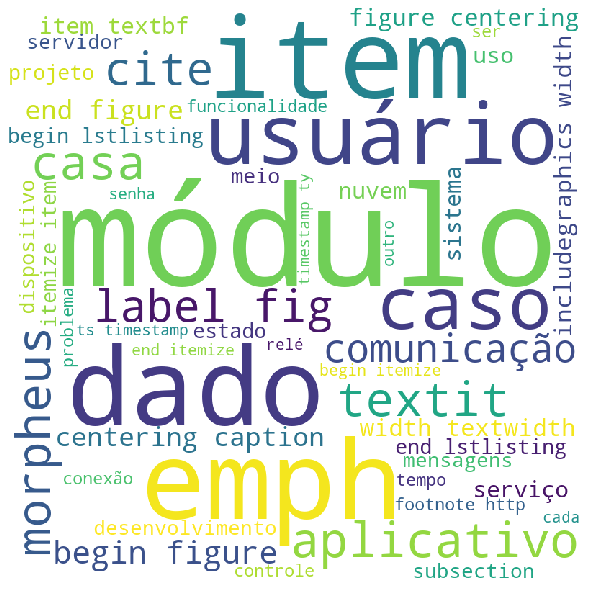

In [24]:
unique_string =(" ").join(all_words) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10, max_words=50).generate(unique_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [31]:
err = 0
all_lines = []
all_sentences = []

for i in range(0, len(series)):
    text = series[i]
    
    try:
        sentences = sent_tokenize(text)

        for sentence in sentences:
            all_sentences.append(sentence)
            
            line = []
            
            words = word_tokenize(sentence.lower())
            words = [word for word in words if word not in stopwords]
            
            for feature in features:
                if feature in words:
                    line.append(1)
                else:
                    line.append(0)
                    
            all_lines.append(line)
            
    except:
        err = err + 1
        
print(err)
print(len(series))

print(all_lines)

print(all_sentences)

0
3068
[[1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 1,

In [90]:
df4 = pd.DataFrame(data=all_lines, columns=features)
print(df4.head())

   tecnologia  chapter  máquina  aprendizado  arquitetura  de
0           1        0        1            1            1   0
1           0        0        1            1            0   0
2           0        0        0            0            0   0
3           0        0        0            0            0   0
4           0        0        1            1            0   0


In [91]:
from sklearn.cluster import KMeans
import numpy as np

In [92]:
kmeans = KMeans(n_clusters=3).fit(df4)

In [93]:
kmeans.labels_

array([1, 1, 0, ..., 0, 0, 0])

In [94]:
df4['kmean'] = kmeans.labels_
df4['kmean'].value_counts()

0    2835
2      46
1      33
Name: kmean, dtype: int64

In [95]:
df4

,tecnologia,chapter,máquina,aprendizado,arquitetura,de,kmean
0,1,0,1,1,1,0,1
1,0,0,1,1,0,0,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...
2909,0,0,0,0,0,0,0
2910,0,0,0,0,0,0,0
2911,0,0,0,0,0,0,0
2912,0,0,0,0,0,0,0


In [96]:
df4.iloc[1]['kmean']

1

In [97]:
len(df4['kmean'])

2914

In [98]:
words_wordcloud = [[],[],[],[]]
for i in range(0, len(df4['kmean'])):
    words_wordcloud[df4.iloc[i]['kmean']].append(all_sentences[i])

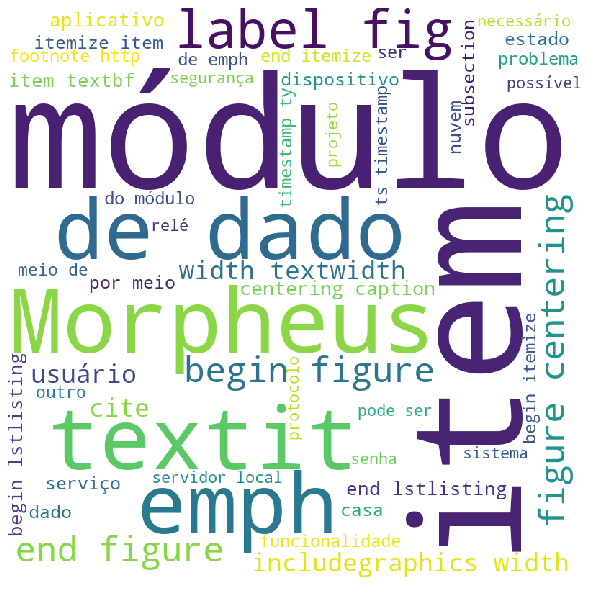

In [106]:
unique_string =(" ").join(words_wordcloud[0]) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10, max_words=50).generate(unique_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

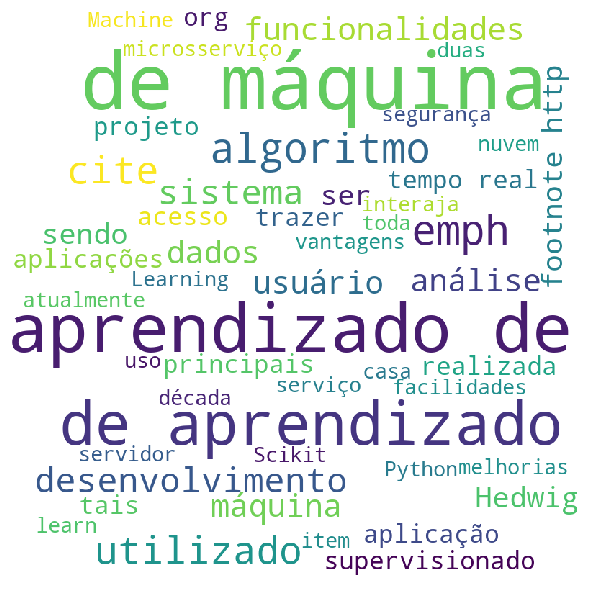

In [107]:
unique_string =(" ").join(words_wordcloud[1]) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10, max_words=50).generate(unique_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

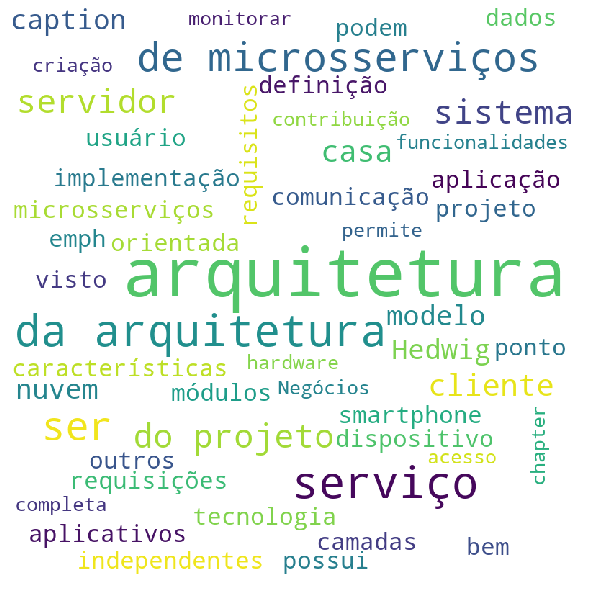

In [108]:
unique_string =(" ").join(words_wordcloud[2]) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10, max_words=50).generate(unique_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [109]:
df4['kmean'] = kmeans.labels_
df4['kmean'].value_counts()

0    2835
2      46
1      33
Name: kmean, dtype: int64

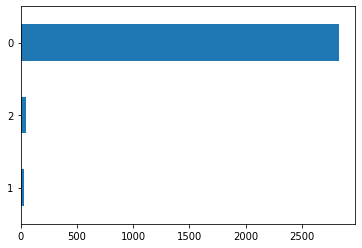

In [110]:
df4.kmean.value_counts().sort_values().plot(kind = 'barh')